In [4]:
%lsmagic


Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

In [23]:
?%matplotlib

Yoy oy oyo
# hsfkhkndv
JOKkfnws vnwvisnvo nsnvlk
feon ksv
jsjcvm


In [2]:
%time a = 3

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 12.2 µs


In [3]:
%time a

CPU times: user 6 µs, sys: 3 µs, total: 9 µs
Wall time: 13.1 µs


3

In [4]:
a

3

In [37]:
import numpy as np
from ipywidgets import *

%matplotlib inline
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1 + np.exp(-x))


## Visualizing one neuron's action

In the following example, we shall visualize the action of a single neuron to a single input.


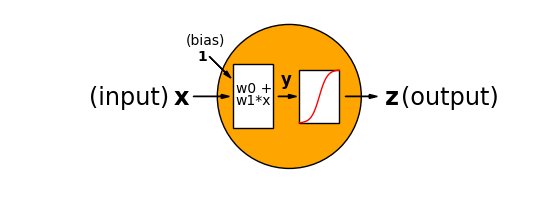

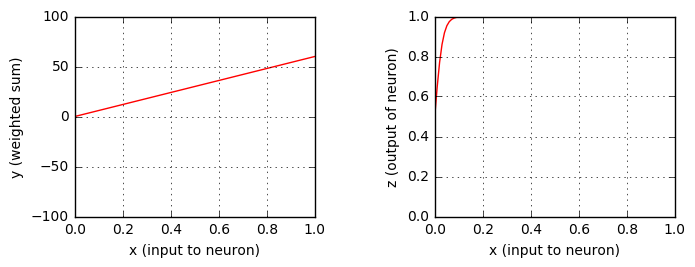

In [139]:
w0 = 1
w1 = 1


def oneNeuron(w0, w1):

    fig1 = plt.figure()
    axes1 = fig1.add_axes([0.1, 0.1, 0.8, 0.4])
    axes2 = fig1.add_axes([0.51, 0.22, 0.08, 0.16])

    axes1.text(-2.5, -0.1, "(input)", size='xx-large');
    axes1.text(-1.45, -0.1, "x", size='xx-large', weight='bold');
    axes1.arrow(-1.2, 0, 0.35, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(-1.15, 0.45, "1", weight='bold')
    axes1.text(-1.3, 0.65, "(bias)")
    axes1.arrow(-1, 0.5, 0.2, -0.2, head_width=0.05, head_length=0.1, fc='k', ec='k')
    circle = plt.Circle((0, 0), radius=.9, fc='#ffa500'); axes1.add_patch(circle)
    wRectangle = plt.Rectangle((-0.7, -0.4), 0.5, 0.8, fc='w'); axes1.add_patch(wRectangle)
    axes1.text(-0.67, 0.05, "w0 +")
    axes1.text(-0.67, -0.1, "w1*x")
    axes1.arrow(-0.14, 0, 0.13, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(-0.1, 0.15, "y", size='large', weight='bold')
    axes1.arrow(0.7, 0, 0.3, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(1.2, -0.1, "z", size='xx-large', weight='bold');
    axes1.text(1.4, -0.1, "(output)", size='xx-large');
    axes1.axis('scaled')
    axes1.grid();
    axes1.set_xlim([-3, 3])
    axes1.set_ylim([-1, 1])
    axes1.axis('off');

    rectangle = plt.Rectangle((-5, 0), 10, 1, fc='w')
    axes2.add_patch(rectangle)
    sigmoidX = np.linspace(-5, 5, 100)
    axes2.plot(sigmoidX, sigmoid(sigmoidX), 'r')
    #axes2.axis('scaled')
    axes2.set_xlim([-6, 6])
    axes2.set_ylim([-0.1, 1.1])
    axes2.axis('off');
    
    x = np.linspace(0.0, 1.0, 100)
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
    ax1.plot(x, w0 + w1*x, 'r');
    ax1.set_position([0.1, 0.1, 0.4, 0.5])
    ax1.grid()
    ax1.set_xlim([0,1])
    ax1.set_ylim([-100,100])
    ax1.set_xlabel("x (input to neuron)")
    ax1.set_ylabel("y (weighted sum)")
    
    ax2.plot(x, sigmoid(w0 + w1*x), 'r');
    ax2.set_position([0.7, 0.1, 0.4, 0.5])
    ax2.grid()
    ax2.set_xlim([0,1])
    ax2.set_ylim([0,1])
    ax2.set_xlabel("x (input to neuron)")
    ax2.set_ylabel("z (output of neuron)")
    

interact(oneNeuron, w0=widgets.IntSlider(min=-100, max=100, step=10, value=-20), w1=widgets.IntSlider(min=-100, max=100, step=10, value=40));

The input is considered to vary from 0 to 1 (standard range, to normalize different-ranged dimensions of the input). In addition to the input, there is a bias added to provide more flexibility to the output. This bias value is always 1.

The first operation done by the neuron is to multiply its inputs (including the bias value) with some weights, and sum those values:

$$y = w_{0} + w_{1}*x$$

The second operation is to make y non-linear. A common function that is used to non-linearity is the sigmoid function:

$$z = sigmoid(y) = \frac{1}{1+e^{-y}} = \frac{1}{1+e^{-(w_{0} + w_{1}*x)}}$$

This way, the output (z) always lies in the range of 0 to 1.

If there are more inpu
